In [1]:
import os

In [2]:
%pwd

'D:\\Desktop\\Deep Learning\\Lab 2\\MNSIT-MLPClassifer\\Research'

In [3]:
os.chdir("../")

In [4]:
%pwd

'D:\\Desktop\\Deep Learning\\Lab 2\\MNSIT-MLPClassifer'

In [10]:
# import arff
# import numpy as np

# # Load ARFF data
# with open(r'Dataset\Unzipped data\mnist_784.arff', 'r') as arff_file:
#     data = arff.load(arff_file)

# # Assuming the last column contains the target values
# # Convert the loaded data to a numpy array first
# data_array = np.array(data['data'])

# print(" MNIST dataset Loaded ")

 MNIST dataset Loaded 


In [11]:
# # This step assumes that all the data can be converted to floats directly
# X = np.array(data_array[:, :-1], dtype=np.float32)
# y = data_array[:, -1]

# # Print the shape of input data and target data
# print("Input data shape:", X.shape)
# print("Target data shape:", y.shape)

Input data shape: (70000, 784)
Target data shape: (70000,)


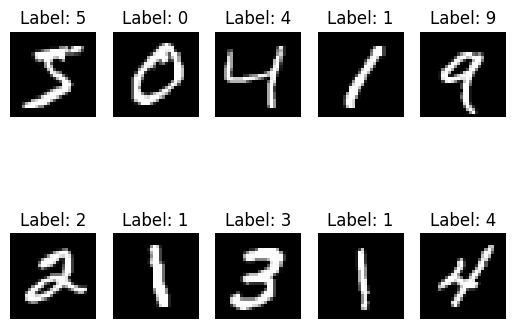

In [12]:
# import matplotlib.pyplot as plt

# # Q3: Reshape and display the top ten images
# X_reshaped = X.reshape(-1, 28, 28)
# for i in range(10):
#     plt.subplot(2, 5, i + 1)
#     plt.imshow(X_reshaped[i], cmap="gray")
#     plt.title(f"Label: {int(y[i])}")
#     plt.axis('off')
# plt.show()

2024-02-05 11:58:50,049 - INFO - ARff MNIST Dataset loaded
2024-02-05 11:58:54,607 - INFO - Validation status written to: D:\Desktop\Deep Learning\Lab 2\MNSIT-MLPClassifer\data_validation\validation_status.txt
2024-02-05 11:58:54,609 - INFO - Input data shape: (70000, 784)
2024-02-05 11:58:54,610 - INFO - Target data shape: (70000,)


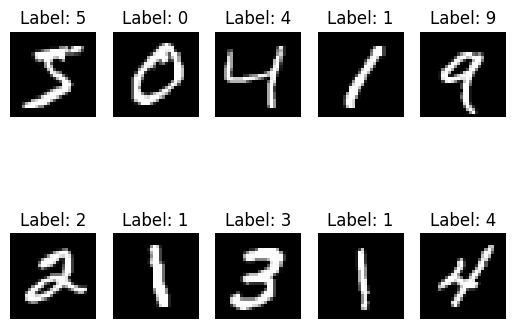

2024-02-05 11:58:56,742 - INFO - Validation completed successfully.


In [16]:
import logging
import os
from dataclasses import dataclass
from pathlib import Path
import arff
import numpy as np
import matplotlib.pyplot as plt

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

@dataclass
class DataValidationConfig:
    root_dir: Path
    status_file: Path
    arff_data_file: Path

class ConfigurationManager:
    def __init__(self, config_dir):
        self.config_dir = config_dir

    def get_data_validation_config(self) -> DataValidationConfig:
        root_dir = Path(self.config_dir, 'data_validation')
        status_file = root_dir / "validation_status.txt"
        arff_data_file = Path(self.config_dir, 'Dataset', 'Unzipped data', 'mnist_784.arff')

        data_validation_config = DataValidationConfig(
            root_dir=root_dir,
            status_file=status_file,
            arff_data_file=arff_data_file
        )

        return data_validation_config

class DataValidation:
    def __init__(self, config: DataValidationConfig):
        self.config = config

    def validate_images(self) -> bool:
        try:

            # Ensure the directory for the status file exists
            self.config.root_dir.mkdir(parents=True, exist_ok=True)
            
            # Load ARFF data
            with open(self.config.arff_data_file, 'r') as arff_file:
                data = arff.load(arff_file)

            logging.info(f"ARff MNIST Dataset loaded")

            # Convert the loaded data to a numpy array
            data_array = np.array(data['data'], dtype=float)

            # Assuming the last column contains the target values
            X = np.array(data_array[:, :-1], dtype=np.float32)
            y = np.array(data_array[:, -1], dtype=np.float32)
            
            # Use the status file to write validation details
            with open(self.config.status_file, 'w', encoding='utf-8') as f:
                f.write(f"Input data shape: {X.shape}\n")
                f.write(f"Target data shape: {y.shape}\n")
                # Add any other details you wish to log here

            # Display the path of the status file using logger
            logging.info(f"Validation status written to: {self.config.status_file.resolve()}")

            # Print the shape of input and target data
            logging.info(f"Input data shape: {X.shape}")
            logging.info(f"Target data shape: {y.shape}")

            # Reshape and display the top ten images
            X_reshaped = X.reshape(-1, 28, 28)
            for i in range(10):
                plt.subplot(2, 5, i + 1)
                plt.imshow(X_reshaped[i], cmap="gray")
                plt.title(f"Label: {int(y[i])}")
                plt.axis('off')
            plt.show()

            logging.info("Validation completed successfully.")
            return True

        except Exception as e:
            logging.error(f"Error during validation: {e}")
            return False

def main():
    # Set config_dir to the absolute path of the dataset directory
    config_dir = Path(os.getcwd())  # Update with your root directory path
    config_manager = ConfigurationManager(config_dir)
    data_validation_config = config_manager.get_data_validation_config()
    data_validation = DataValidation(data_validation_config)
    data_validation.validate_images()

if __name__ == "__main__":
    main()

In [17]:
# Read the dataset from a text file
file_path = r"data_validation\validation_status.txt"
with open(file_path, 'r', encoding='utf-8') as file:
    dataset_text = file.read()

print(dataset_text)

Input data shape: (70000, 784)
Target data shape: (70000,)

